In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('titanic_train.csv')

In [3]:
test_df = pd.read_csv('titanic_test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

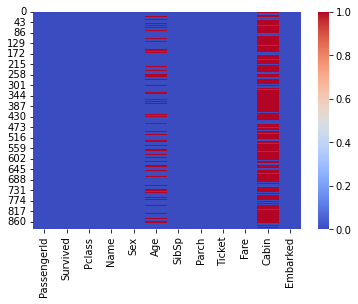

In [7]:
sns.heatmap(data=train_df.isnull(),cmap='coolwarm')

<AxesSubplot:xlabel='Sex', ylabel='count'>

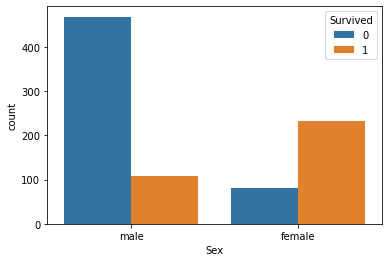

In [8]:
sns.countplot(data=train_df,x='Sex',hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

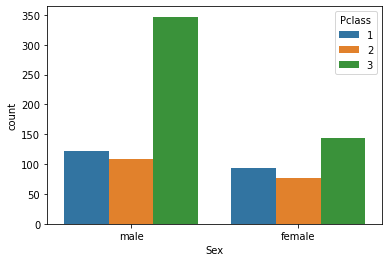

In [9]:
sns.countplot(data=train_df,x='Sex',hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

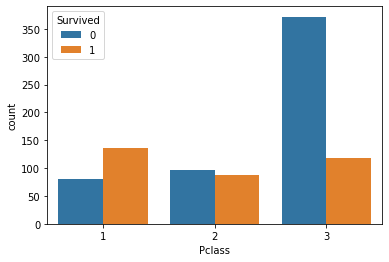

In [10]:
sns.countplot(data=train_df,x='Pclass',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

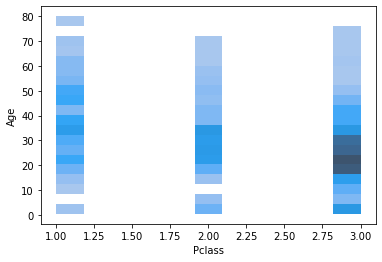

In [11]:
sns.histplot(data=train_df,y='Age',x='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

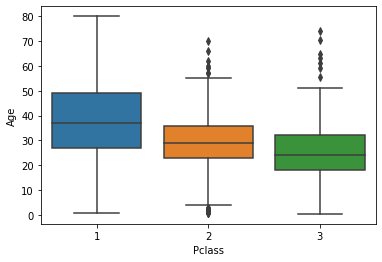

In [12]:
sns.boxplot(data=train_df,x='Pclass',y='Age')

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

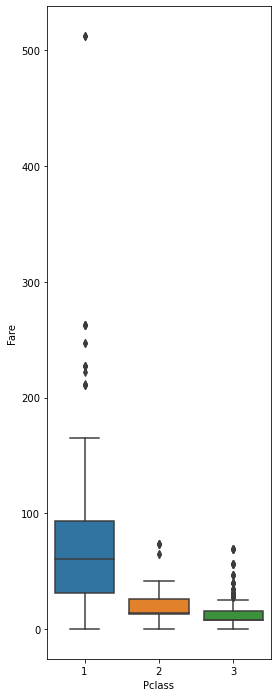

In [14]:
plt.figure(figsize=(4,12))
sns.boxplot(data=train_df,x='Pclass',y='Fare')

<AxesSubplot:>

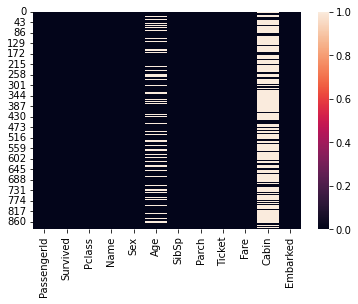

In [15]:
sns.heatmap(train_df.isnull())

<AxesSubplot:xlabel='Age', ylabel='count'>

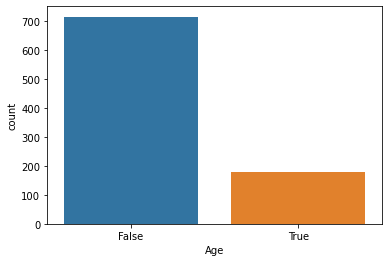

In [16]:
sns.countplot(x=train_df['Age'].isnull())

<AxesSubplot:xlabel='Cabin', ylabel='count'>

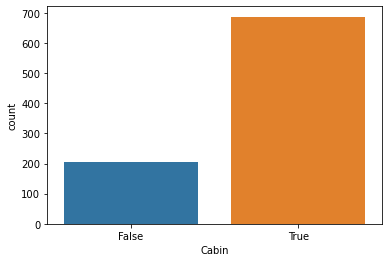

In [17]:
sns.countplot(x=train_df['Cabin'].isnull())

In [18]:
#drop cabin and impute age

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return train_df[train_df['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return train_df[train_df['Pclass']==2]['Age'].mean()
        else:
            return train_df[train_df['Pclass']==3]['Age'].mean()
    else:
        return Age

In [20]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

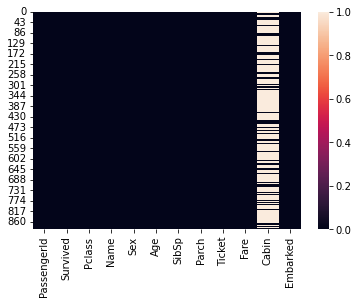

In [21]:
sns.heatmap(data=train_df.isnull())

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
cls = pd.get_dummies(data=train_df['Pclass'],drop_first=True)

In [24]:
sex = pd.get_dummies(data=train_df['Sex'],drop_first=True)

In [25]:
embark = pd.get_dummies(data=train_df['Embarked'],drop_first=True)

In [26]:
train_df = pd.concat([train_df,cls,sex,embark],axis=1)

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,1


In [28]:
train_df['second_class'] = train_df[2] 

In [29]:
train_df['third_class'] = train_df[3]

In [30]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,male,Q,S,second_class,third_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,1,0,1


In [31]:
train_df.drop(['Sex','Name','Pclass','Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)

In [32]:
train_df.drop([2,3],axis=1,inplace=True)

In [33]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [34]:
train_df.dropna()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,0,22.00000,1,0,7.2500,1,0,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,0,1,0,1
3,1,35.00000,1,0,53.1000,0,0,1,0,0
4,0,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,1,1,0
887,1,19.00000,0,0,30.0000,0,0,1,0,0
888,0,25.14062,1,2,23.4500,0,0,1,0,1
889,1,26.00000,0,0,30.0000,1,0,0,0,0


In [35]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [36]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return test_df[test_df['Pclass']==1]['Age'].mean()
        elif Pclass==2:
            return test_df[test_df['Pclass']==2]['Age'].mean()
        else:
            return test_df[test_df['Pclass']==3]['Age'].mean()
    else:
        return Age
    

In [38]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_test_age,axis=1)

<AxesSubplot:>

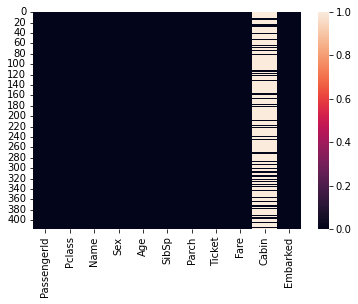

In [39]:
sns.heatmap(data=test_df.isnull())

In [40]:
test_df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

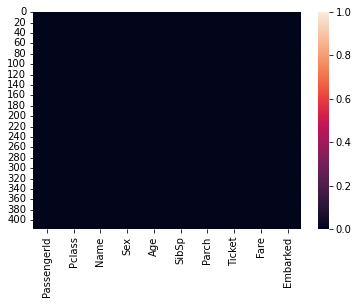

In [41]:
sns.heatmap(data=test_df.isnull())

In [42]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
gender = pd.get_dummies(data=test_df['Sex'],drop_first=True)
city = pd.get_dummies(data=test_df['Embarked'],drop_first=True)
clss = pd.get_dummies(data=test_df['Pclass'],drop_first=True)

In [44]:
test_df = pd.concat([test_df,gender,city,clss],axis=1)

In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [46]:
test_df['second_class'] = test_df[2]
test_df['third_class'] = test_df[3]

In [47]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3,second_class,third_class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1,0,1


In [48]:
test_df.drop(['PassengerId','Pclass','Sex','Ticket','Embarked',2,3],inplace=True,axis=1)

In [49]:
test_df.drop('Name',axis=1,inplace=True)

In [50]:
test_df.head()

,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [51]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [52]:
train_df.dropna()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,0,22.00000,1,0,7.2500,1,0,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,0,1,0,1
3,1,35.00000,1,0,53.1000,0,0,1,0,0
4,0,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,1,1,0
887,1,19.00000,0,0,30.0000,0,0,1,0,0
888,0,25.14062,1,2,23.4500,0,0,1,0,1
889,1,26.00000,0,0,30.0000,1,0,0,0,0


In [53]:
test_df.dropna()

,Age,SibSp,Parch,Fare,male,Q,S,second_class,third_class
0,34.500000,0,0,7.8292,1,1,0,0,1
1,47.000000,1,0,7.0000,0,0,1,0,1
2,62.000000,0,0,9.6875,1,1,0,1,0
3,27.000000,0,0,8.6625,1,0,1,0,1
4,22.000000,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,24.027945,0,0,8.0500,1,0,1,0,1
414,39.000000,0,0,108.9000,0,0,0,0,0
415,38.500000,0,0,7.2500,1,0,1,0,1
416,24.027945,0,0,8.0500,1,0,1,0,1


In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           418 non-null    float64
 1   SibSp         418 non-null    int64  
 2   Parch         418 non-null    int64  
 3   Fare          417 non-null    float64
 4   male          418 non-null    uint8  
 5   Q             418 non-null    uint8  
 6   S             418 non-null    uint8  
 7   second_class  418 non-null    uint8  
 8   third_class   418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'second_class', 'third_class'],
      dtype='object')

In [57]:
X = train_df[['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S',
       'second_class', 'third_class']]
y = train_df['Survived']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.7)

In [60]:
lr = LogisticRegression(max_iter=1200)

In [61]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1200)

In [63]:
pred = lr.predict(X_test)

In [64]:
# no y_test to see the model performance